(3, 5, 3) (3, 5, 3)
[[[0.68787767 1.91753193 3.16356769]
  [0.90226059 1.72103857 2.76446926]
  [0.31478091 2.15152237 3.08437549]
  [0.79503839 1.69366049 2.65925792]
  [0.47915893 1.83812902 3.25268846]]

 [[0.43732706 1.5441072  2.02651849]
  [0.36973938 1.73408913 3.16704124]
  [0.3475662  1.46423751 3.49773649]
  [0.55519615 2.25503657 3.50432063]
  [0.28982946 1.75230983 4.07836385]]

 [[1.01161923 3.12523771 2.68067367]
  [0.80456228 3.70161423 2.08602622]
  [0.69617089 2.16899407 2.23619827]
  [0.77052997 2.05961064 4.15106215]
  [1.24536465 2.10167609 3.78266776]]]


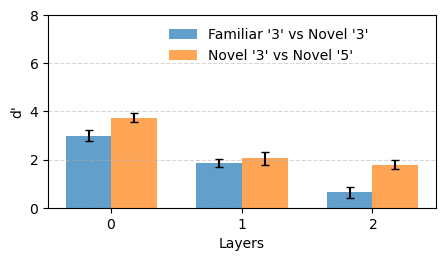

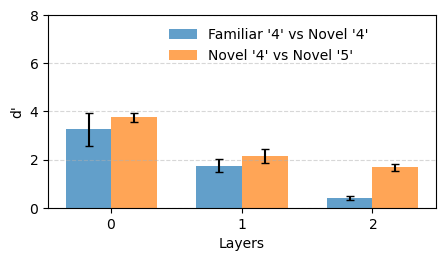

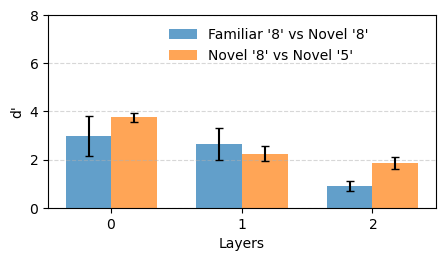

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

save_path = os.path.join('results', 'hierarchical_models')

# cases with multiple base classes and a single test class
base_class = [3,4,8]; test_class = [5]
# base_class = [2,3,4,5,6,7,8,9,0]; test_class = [1]

is_fully_connected = False # set to False for locally connected hPCN

# Reconstruct the folder name and path using the parameters
if is_fully_connected:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}_fully_connected"
else:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}"

save_path = os.path.join(save_path, folder_name)

# Check if the folder exists and read from it
if not os.path.exists(save_path):
    print(f"Folder {save_path} does not exist.")


separability = np.load(os.path.join(save_path, 'separability.npz'))
separability_12 = separability['separability_12']
separability_23 = separability['separability_23']
print(separability_12.shape, separability_23.shape)
print(separability_12)

# x-axis locations for the groups
layers = np.arange(3)

# Width of the bars
bar_width = 0.35

for digit_index, digit in enumerate(base_class):
    
    plt.figure(figsize=(5, 2.5))
    # plt.title(f"d' separability between classes of digits by layers")
    sep_12 = separability_12[digit_index]
    sep_23 = separability_23[digit_index]

    avg12 = np.mean(sep_12, axis=0)[::-1]
    std12 = np.std(sep_12, axis=0)[::-1]
    avg23 = np.mean(sep_23, axis=0)[::-1]
    std23 = np.std(sep_23, axis=0)[::-1]

    # Plotting the bars
    # plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=yerr12,
    #         label=f'sep. between familiar {base_class} and novel {base_class}', capsize=5)
    # plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=yerr23,
    #         label=f'sep. between novel {base_class} and novel {test_class}', capsize=5)
    plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=std12,
            label=f"Familiar '{digit}' vs Novel '{digit}'", capsize=3, alpha=0.7)
    plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=std23,
            label=f"Novel '{digit}' vs Novel '{test_class[0]}'", capsize=3, alpha=0.7)

    plt.ylabel("d'")
    plt.xlabel('Layers')
    plt.xticks(layers, [f'${i}$' for i in range(3)])
    # set the y-axis limits for uniform comparison across trials
    plt.ylim(0, 8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend(loc='upper center', bbox_to_anchor=(0.57, 1), frameon=False)
    plt.savefig(save_path + f'/separability_by_layers_digit={digit}.pdf', bbox_inches='tight')
    plt.show()